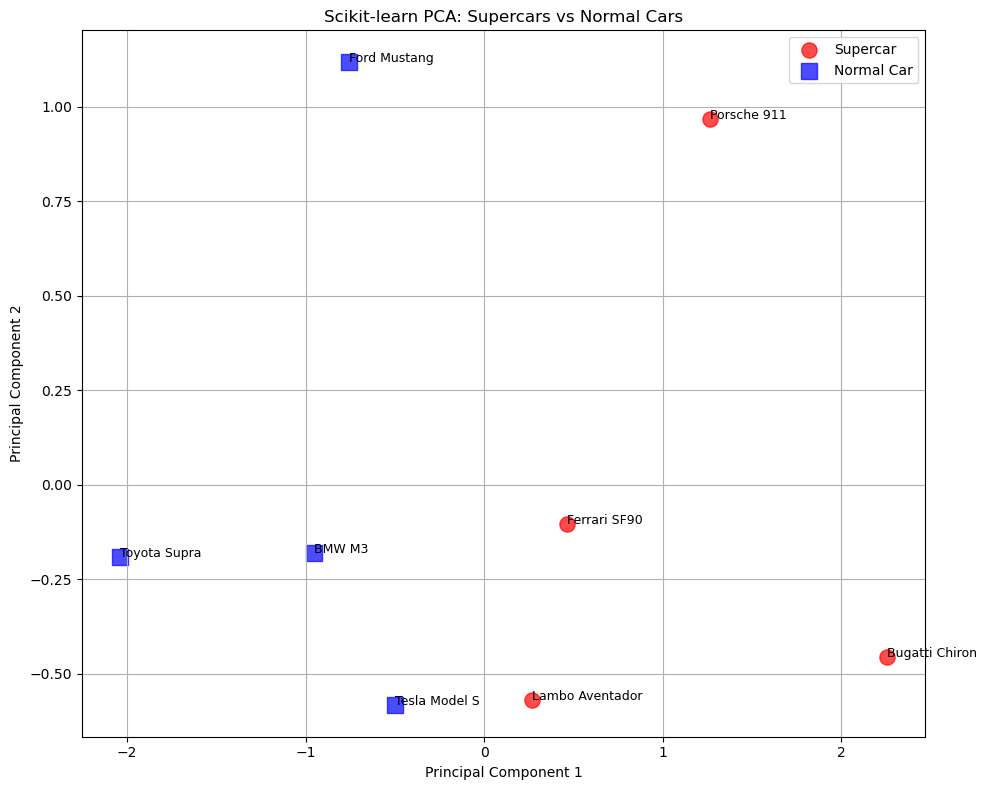

In [4]:
#Pca Implementation taking Car horsepower and top speed as dats points and classify them into Supercar and Normal car
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Car data: Horsepower & Top Speed
data = [
    ['Ferrari SF90', 1000, 340, 1],
    ['Lambo Aventador', 770, 350, 1],
    ['Bugatti Chiron', 1500, 420, 1],
    ['Porsche 911', 1650, 330, 1],
    ['Tesla Model S', 500, 322, 0],
    ['BMW M3', 480, 290, 0],
    ['Toyota Supra', 100, 250, 0],
    ['Ford Mustang', 1000, 249, 0],
]
features = ['Horsepower', 'Top Speed']
df = pd.DataFrame(data, columns=['Model'] + features + ['IsSupercar'])

# Standardize features
X = df[features].astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA using scikit-learn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(10,8))
for label, marker, color in zip([1, 0], ['o', 's'], ['red', 'blue']):
    idxs = [i for i, l in enumerate(df['IsSupercar']) if l == label]
    plt.scatter(X_pca[idxs,0], X_pca[idxs,1],
                marker=marker, color=color, s=120, alpha=0.7,
                label='Supercar' if label == 1 else 'Normal Car')
    for i in idxs:
        plt.annotate(df.iloc[i]['Model'], (X_pca[i,0], X_pca[i,1]), fontsize=9)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scikit-learn PCA: Supercars vs Normal Cars')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
